In [1]:
import math
import sys
sys.path.append("..")

from federated_library.distributions import convert_to_federated_data
from federated_library.dataset_loader import load_tf_dataset
from federated_library.train_fed_avg import fed_avg_intervalsearch

In [2]:
degree = 3
interval = 0


def reluApprox(x):
    if degree == 3:
        if interval == 3:
            return 0.7146 + 1.5000 * (x/interval) + 0.8793 * (x/interval)**2
        if interval == 5:
            return 0.7865 + 2.5000 * (x/interval) + 1.88 * (x/interval)**2
        if interval == 7:
            return 0.9003 + 3.5000 * (x/interval) + 2.9013 * (x/interval)**2
        if interval == 10:
            return 1.1155 + 5 * (x/interval) + 4.4003 * (x/interval)**2
        if interval == 12:
            return 1.2751 + 6 * (x/interval) + 5.3803 * (x/interval)**2
    if degree == 5:
        if interval == 7:
            return 0.7521 + 3.5000 * (x/interval) + 4.3825 * (x/interval)**2 - 1.7281 * (x/interval)**4
        if interval == 20:
            return 1.3127 + 10 * (x/interval) + 15.7631 * (x/interval)**2 - 7.6296 * (x/interval)**4

In [4]:
def run(hyperparams, ds, test_split, ds_info, display):

    for i in range(len(hyperparams['client_lr'])):
        ds_info['num_clients'] = hyperparams['clients_set'][i]
        skew = hyperparams['skews_set'][i]

        act = hyperparams['act_fn'][0]
        intervals = hyperparams['intervals']
        clr = hyperparams['client_lr'][i]
        slr = hyperparams['server_lr'][0]
        cmom = hyperparams['client_momentum'][i]
        smom = hyperparams['server_momentum'][0]
        bs = hyperparams['batch_size'][i]
        epr = hyperparams['epochs_per_round'][0]
        r = hyperparams['rounds'][0]
        runs = hyperparams['runs']

        params = dict(clients=ds_info['num_clients'], skew=skew, act_fn=act, client_lr=clr, server_lr=slr,
                      client_momentum=cmom, server_momentum=smom, batch_size=bs,
                      epochs_per_round=epr, rounds=r, runs=runs, intervals=intervals)

        fedavg_hyperparams_interval_search_res = fed_avg_intervalsearch(
            params, ds, test_split, ds_info, display)
        sorted_res = fedavg_hyperparams_interval_search_res
        sorted_res.sort(key=lambda e: e[0], reverse=True)

        textfile = open(
            f"intervals_{dataset_name}_{skew_type}_skew_{skew}_{ds_info['num_clients']}clients.txt", "w")
        for line in sorted_res:
            textfile.write(str(line)+"\n")
        textfile.close()

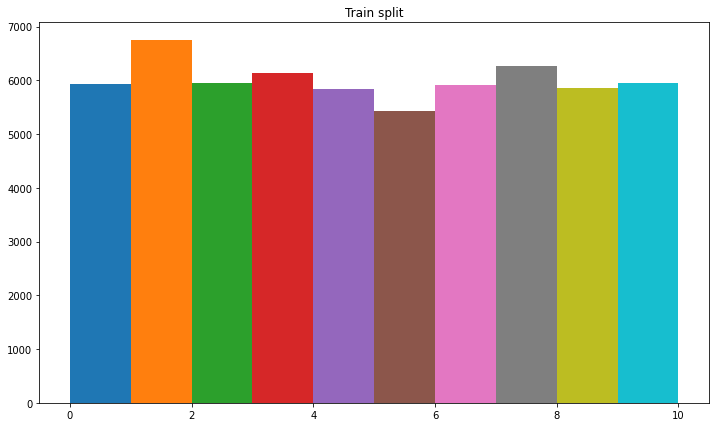

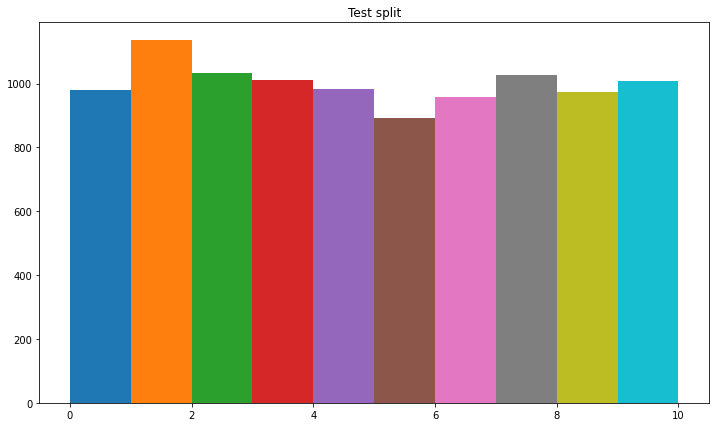

/home/simon/FJTEST/poseidon/lib/python3.6/site-packages/tensorflow_federated/python/simulation/datasets/serializable_client_data.py:112: UserWarning: Creating resources inside a function passed to Dataset.flat_map() is not supported. Create each resource outside the function, and capture it inside the function to use it.
  example_dataset = nested_dataset.flat_map(self.serializable_dataset_fn)


Training with params : {'clients': 10, 'skew': 0.1, 'act_fn': <function reluApprox at 0x7ff718914ea0>, 'client_lr': 0.02359272784332701, 'server_lr': 0.03162277660168379, 'client_momentum': 0.37444193717091573, 'server_momentum': 0.9, 'batch_size': 44, 'epochs_per_round': 2, 'rounds': 30, 'runs': 1, 'intervals': [3, 5, 7, 10, 12], 'interval': 3}
Label skew


/home/simon/FJTEST/poseidon/lib/python3.6/site-packages/jax/_src/numpy/lax_numpy.py:3085: UserWarning: Explicitly requested dtype float64 requested in zeros is not available, and will be truncated to dtype float32. To enable more dtypes, set the jax_enable_x64 configuration option or the JAX_ENABLE_X64 shell environment variable. See https://github.com/google/jax#current-gotchas for more.
  lax._check_user_dtype_supported(dtype, "zeros")


In [ ]:
dataset_name = "mnist"
experiment_name = f"{dataset_name}_non-iid"
skew_type = "label"

ds, (x_test, y_test), ds_info = load_tf_dataset(
    dataset_name=dataset_name, skew_type=skew_type, decentralized=False,
    display=False
)

test_split = convert_to_federated_data(x_test, y_test, ds_info, is_train=False)


hyperparams = dict(
    act_fn=[reluApprox],
    intervals=[3, 5, 7, 10, 12],
    client_lr=[0.02359272784332701, 0.0205964140154576, 0.021041110212532167,
               0.016441616450070553, 0.023167248345505664, 0.0143186315303439,
               0.01866746139165057, 0.01834264896835387, 0.019569011208507413,
               0.018918597034391763],
    server_lr=[math.sqrt(0.001)],
    client_momentum=[0.37444193717091573, 0.24679926749118195, 0.5127673758314129,
                     0.3841951159290946, 0.7217274687604236, 0.2674569120042026,
                     0.4121600355164831, 0.4889208913350354, 0.49567215513624246,
                     0.5369164996342611],
    server_momentum=[0.9],
    batch_size=[44, 13, 32, 29, 23, 13, 26, 18, 18, 21],
    epochs_per_round=[2],
    rounds=[30],
    runs=1,
    clients_set=[10, 10, 10, 10, 10, 20, 20, 20, 20, 20],
    skews_set=[0.1, 0.4, 1.0, 2.0, 5.0, 0.1, 0.4, 1.0, 2.0, 5.0])
run(hyperparams, ds, test_split, ds_info, False)